<div class="alert alert-block alert-info">
    
# Ames Data Analysis


<div class="alert alert-block alert-warning">
    
# This notebook is just for illustrative purposes. The model fit here is *_not_* the best model for the data.

In [15]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [17]:
ames = pd.read_csv("AmesHousing.csv", index_col="Order")
# Check dimensions of the data
print(" Dimensions of the imported dataset is: " + str(ames.shape))

 Dimensions of the imported dataset is: (2930, 81)


In [18]:
# Print top 2 rows in the dataset
ames.head(4)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


In [19]:
ames.columns = ames.columns.str.replace(' ', '')
ames.columns = [col.lower() for col in ames]
#ames.columns

In [20]:
# Marking the features or columns as numeric or categorical for easy referencce later in the code
numericfeatures = [f for f in ames.columns if ames.dtypes[f] != 'object']
print("Number of Numerical features: ", len(numericfeatures))

categoricalfeatures = [f for f in ames.columns if ames.dtypes[f] == 'object']
print("Number of Categorical features: ", len(categoricalfeatures))

Number of Numerical features:  38
Number of Categorical features:  43


In [21]:
print("numeric features: " + str(numericfeatures))
print("categorical features: " + str(categoricalfeatures))

numeric features: ['pid', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremod/add', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice']
categorical features: ['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'firepla

<AxesSubplot:>

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: saleprice, dtype: float64

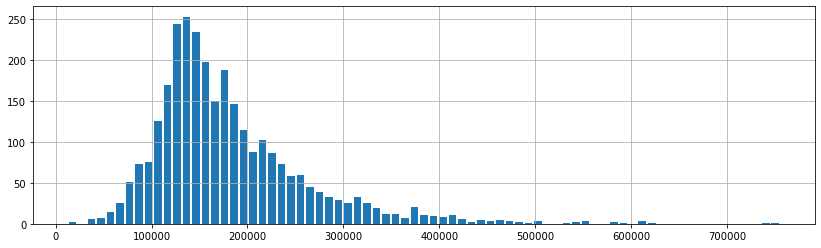

In [22]:
# What is the distribution of sale price
ames['saleprice'].hist(bins=75, rwidth=.8, figsize=(14,4))
ames['saleprice'].describe()

The minimum sale price is at 12,789 while the maximum sale price is 755,000. The median sale price was $160,000. The distribution seems to be skewed with a few very high priced house sales on the right

<BarContainer object of 5 artists>

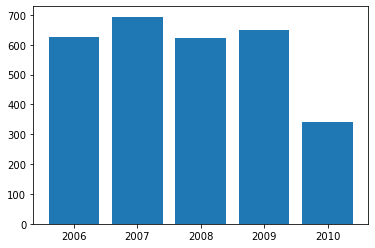

In [23]:
# Date range in the data
yax = ames.groupby(['yrsold'])['yrsold'].count()
plt.bar(yax.index, yax)

The data was collected from 2006 to 2010. 
Note: Data includes the 2008 downturn event. Effects of which in the data is yet to be seen

In [24]:
from datetime import date
date_sold = pd.DataFrame({'year': ames['yrsold'], 'month' : ames['mosold']})

DATE = []
for yr, mo in zip(date_sold.year, date_sold.month):
    DATE.append(date(yr, mo, 10))

ames['yrmosold'] = DATE
ames.head()

,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,yrmosold
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,2010-05-10
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,2010-06-10
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,2010-06-10
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,2010-04-10
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2010-03-10


<AxesSubplot:xlabel='yrmosold'>

Text(0.5, 1.0, 'Seasonality in Houses sold')

Text(0, 0.5, '# of houses sold')

Text(0.5, 0, 'Sale Year-Month')

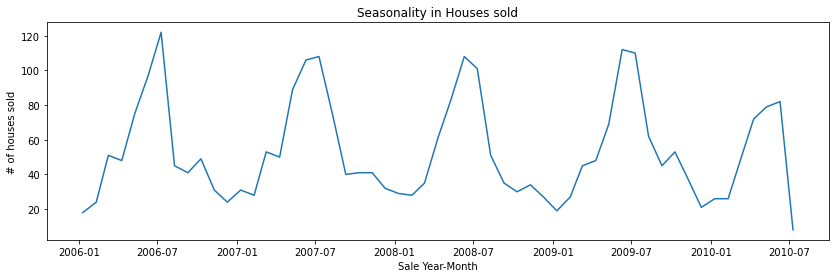

In [25]:
# Is there seasonality in house sales
ames.groupby(['yrmosold']).pid.count().plot(kind='line', figsize=(14,4))
plt.title('Seasonality in Houses sold')
plt.ylabel('# of houses sold')
plt.xlabel('Sale Year-Month')

There is a clear seasonal pattern in house sales, peaking in summer. However 2010 seems to be different from the previous few years in number of houses sold.

<AxesSubplot:xlabel='neighborhood'>

Text(0.5, 1.0, 'Number of houses sold by neighborhood')

Text(0, 0.5, '# of houses sold')

<AxesSubplot:title={'center':'saleprice'}, xlabel='[neighborhood]'>

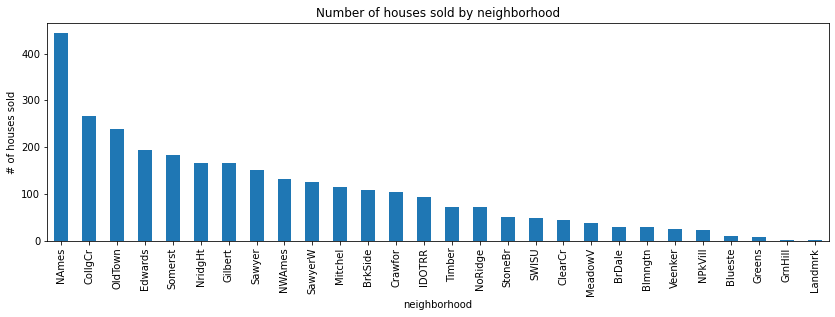

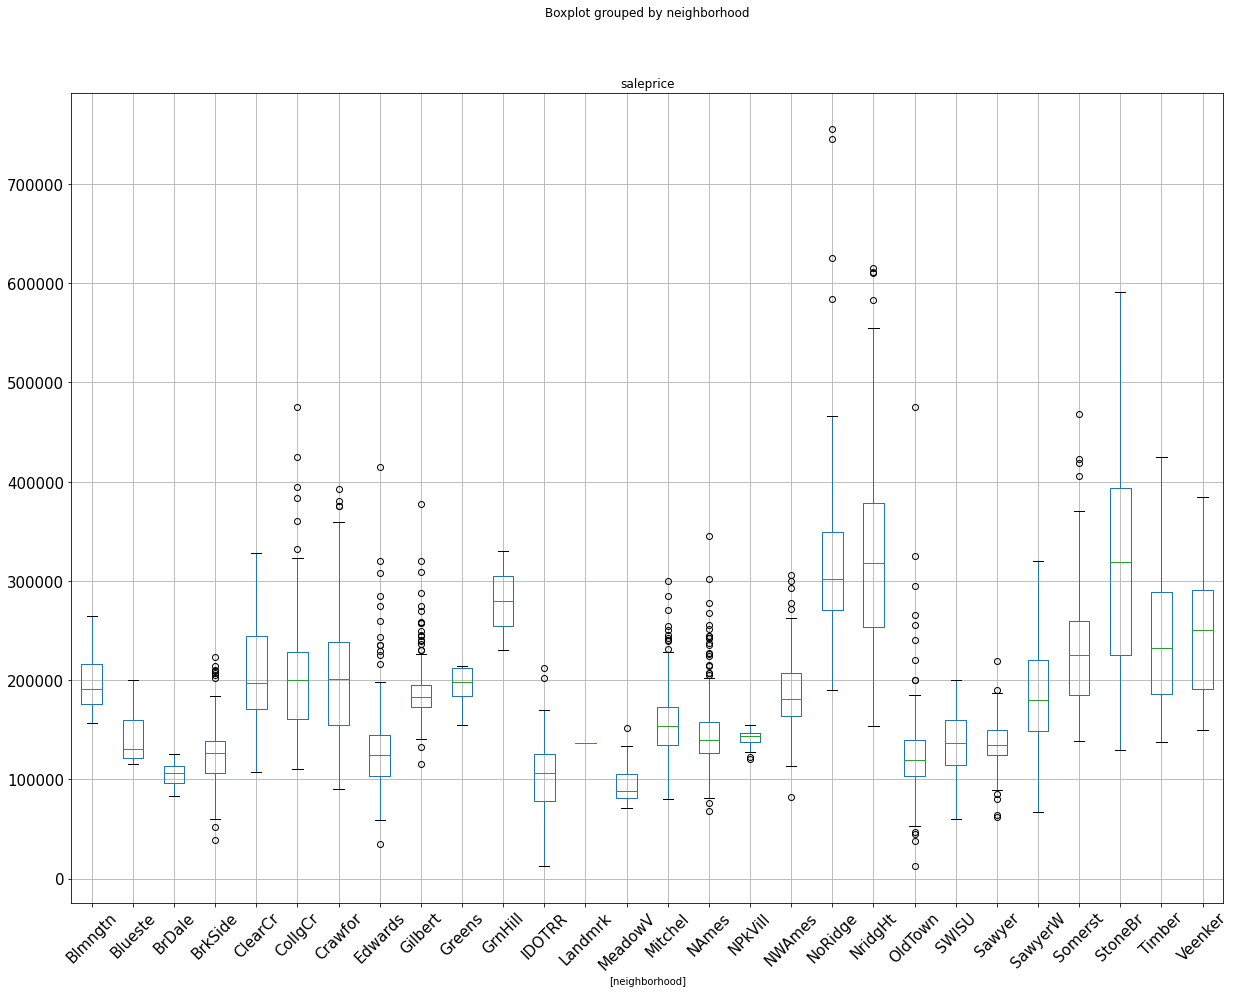

In [26]:
ames.groupby(['neighborhood']).pid.count().sort_values(ascending=False).plot(kind='bar', figsize=(14,4))
plt.title('Number of houses sold by neighborhood')
plt.ylabel('# of houses sold')

ames[['saleprice','neighborhood']].boxplot(column=['saleprice'], by=['neighborhood']
                                           ,rot=45, fontsize=15, figsize=(20,15))

NAmes had the highest number of house sold in the sample data. NWAmes had a few houses sold at the highest price in the dataset.

## Clean Data

1. Drop duplicates
2. Handle missing values

#### Check and Drop Duplicates

In [27]:
# Drop duplicates
before = ames.shape[0]
ames.drop_duplicates(inplace = True, keep = 'last')
rows_dropped = before - ames.shape[0]
print(str(rows_dropped) + ' ' +  "duplicate rows dropped from the the dataset")

0 duplicate rows dropped from the the dataset


#### Check and Handle Missing Values

In [28]:
#Check for missing values
print("Columns by % of missing values in descending order")
ames.isnull().sum()[ames.isnull().sum()>0].sort_values(ascending = False)*100/ames.shape[0]

Columns by % of missing values in descending order


poolqc          99.556314
miscfeature     96.382253
alley           93.242321
fence           80.477816
fireplacequ     48.532423
lotfrontage     16.723549
garageyrblt      5.426621
garagecond       5.426621
garagequal       5.426621
garagefinish     5.426621
garagetype       5.358362
bsmtexposure     2.832765
bsmtfintype2     2.764505
bsmtcond         2.730375
bsmtqual         2.730375
bsmtfintype1     2.730375
masvnrtype       0.784983
masvnrarea       0.784983
bsmthalfbath     0.068259
bsmtfullbath     0.068259
garagecars       0.034130
bsmtfinsf2       0.034130
bsmtfinsf1       0.034130
bsmtunfsf        0.034130
totalbsmtsf      0.034130
garagearea       0.034130
electrical       0.034130
dtype: float64

In [29]:
# Since most of the categorical data that is missing is due to absence of feature in the home. 
# So we are imputing the missing values with "none" 
# Impute missing values


for col in categoricalfeatures:
    ames[col].fillna('none',inplace=True)

In [30]:
# To illustrate, we are imputing the missing values for numeric features with median.
ames.fillna(ames.median(), inplace=True)

In [31]:
#Check for missing values
print("Columns by % of missing values in descending order")
ames.isnull().sum()[ames.isnull().sum()>0].sort_values(ascending = False)*100/ames.shape[0]

Columns by % of missing values in descending order


Series([], dtype: float64)

## EDA

### Univariate

array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'mssubclass'}>,
        <AxesSubplot:title={'center':'lotfrontage'}>,
        <AxesSubplot:title={'center':'lotarea'}>,
        <AxesSubplot:title={'center':'overallqual'}>,
        <AxesSubplot:title={'center':'overallcond'}>],
       [<AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'yearremod/add'}>,
        <AxesSubplot:title={'center':'masvnrarea'}>,
        <AxesSubplot:title={'center':'bsmtfinsf1'}>,
        <AxesSubplot:title={'center':'bsmtfinsf2'}>,
        <AxesSubplot:title={'center':'bsmtunfsf'}>],
       [<AxesSubplot:title={'center':'totalbsmtsf'}>,
        <AxesSubplot:title={'center':'1stflrsf'}>,
        <AxesSubplot:title={'center':'2ndflrsf'}>,
        <AxesSubplot:title={'center':'lowqualfinsf'}>,
        <AxesSubplot:title={'center':'grlivarea'}>,
        <AxesSubplot:title={'center':'bsmtfullbath'}>],
       [<AxesSubplot:title={'center':'bsmthalfbat

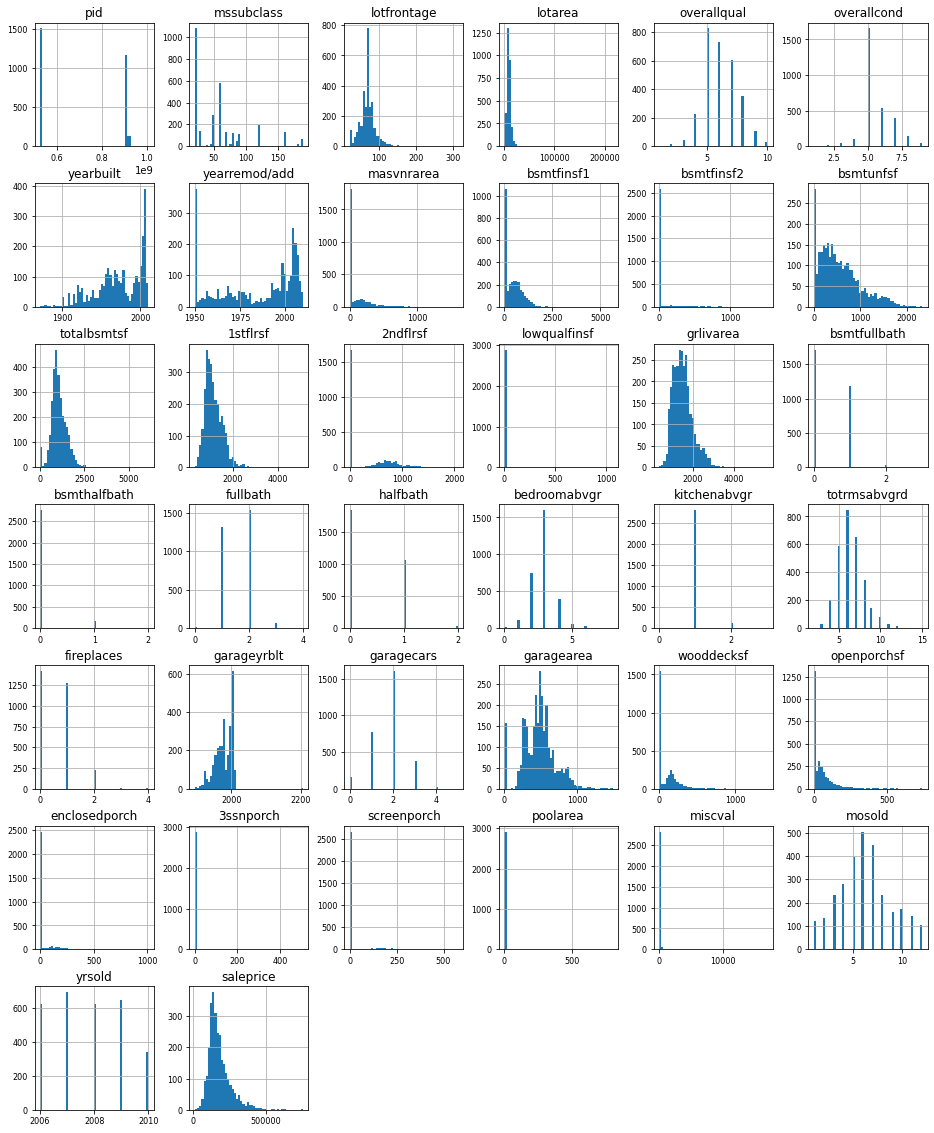

In [32]:
# plot histogram chart
ames[numericfeatures].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    

Some of the numeric features seem to be categories. 
There are features that indicate time 

In [33]:
for col in list(categoricalfeatures) :
    print(ames[col].value_counts())
    print('#'*50)

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: mszoning, dtype: int64
##################################################
Pave    2918
Grvl      12
Name: street, dtype: int64
##################################################
none    2732
Grvl     120
Pave      78
Name: alley, dtype: int64
##################################################
Reg    1859
IR1     979
IR2      76
IR3      16
Name: lotshape, dtype: int64
##################################################
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: landcontour, dtype: int64
##################################################
AllPub    2927
NoSewr       2
NoSeWa       1
Name: utilities, dtype: int64
##################################################
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: lotconfig, dtype: int64
##################################################
Gtl    2789
Mod     125
Sev      16
Name: 

In [34]:
# Drop categorical features that are highly skewed 
before = ames.shape[1]
drop_cols =  ['heating', 'roofmatl','condition2', 'street', 'utilities', 'alley']
ames.drop(drop_cols, axis = 1, inplace = True)
columns_dropped = before - ames.shape[1]
print(str(columns_dropped) + ' ' + 'columns dropped from the original dataset')

6 columns dropped from the original dataset


## Feature Engineering 
1. Create categorical features
2. Take math transformation

In [35]:
ames['log_saleprice'] = np.log(ames['saleprice'])

In [36]:
ames['age']= ames['yrsold']-ames['yearbuilt']

In [37]:
ames['totalbath'] = ames['fullbath'] + ames['halfbath']*0.5 + ames['bsmtfullbath'] + ames['bsmthalfbath']*0.5
ames['totalsqft']= ames['totalbsmtsf'] + ames['1stflrsf'] + ames['2ndflrsf']

In [38]:
neighmap  = {'NoRidge':3,'NridgHt':3, 'Somerst':3,
             'NAmes':1,'Sawyer':1,'OldTown':1,'Edwards':1,'BrkSide':1, 
             'CollgCr':2, 'NWAmes': 2, 'SawyerW':2, 'Mitchel':2, 'Crawfor': 2, 'IDOTRR': 2, 'Timber': 2,
             'StoneBr': 2, 'SWISU': 2, 'ClearCr': 2, 'MeadowV': 2, 'BrDale': 2, 'Blmngtn': 2, 'Veenker':2,
             'NPkVill': 2, 'Blueste': 2, 'Greens': 2, 'GrnHill': 2, 'Landmrk': 2, 'Crawfor': 2, 'Gilbert':2}
ames['neighborbuckets'] = ames['neighborhood'].map(neighmap)

In [39]:
ames.head(3)

,pid,mssubclass,mszoning,lotfrontage,lotarea,lotshape,landcontour,lotconfig,landslope,neighborhood,...,yrsold,saletype,salecondition,saleprice,yrmosold,log_saleprice,age,totalbath,totalsqft,neighborbuckets
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,IR1,Lvl,Corner,Gtl,NAmes,...,2010,WD,Normal,215000,2010-05-10,12.278393,50,2.0,2736.0,1
2,526350040,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,...,2010,WD,Normal,105000,2010-06-10,11.561716,49,1.0,1778.0,1
3,526351010,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,...,2010,WD,Normal,172000,2010-06-10,12.055250,52,1.5,2658.0,1


In [40]:
# created boolean features
ames['hasbasement'] = ames.totalbsmtsf.apply(lambda x: 1 if x > 0 else 0)
ames['hasgarage'] = ames.garagearea.apply(lambda x: 1 if x > 0 else 0)
ames['haspool'] = ames.poolarea.apply(lambda x: 1 if x > 0 else 0)
ames['wasremodeled'] = (ames['yearremod/add'] != ames.yearbuilt).astype(np.int64)

In [41]:
# Marking the features or columns as numeric or categorical for easy referencce later in the code
numericfeatures = [f for f in ames.columns if ames.dtypes[f] != 'object']
print("Number of Numerical features: ", len(numericfeatures))

categoricalfeatures = [f for f in ames.columns if ames.dtypes[f] == 'object']
print("Number of Categorical features: ", len(categoricalfeatures))

Number of Numerical features:  47
Number of Categorical features:  38


## Visualization

### Univariate

array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'mssubclass'}>,
        <AxesSubplot:title={'center':'lotfrontage'}>,
        <AxesSubplot:title={'center':'lotarea'}>,
        <AxesSubplot:title={'center':'overallqual'}>,
        <AxesSubplot:title={'center':'overallcond'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>],
       [<AxesSubplot:title={'center':'yearremod/add'}>,
        <AxesSubplot:title={'center':'masvnrarea'}>,
        <AxesSubplot:title={'center':'bsmtfinsf1'}>,
        <AxesSubplot:title={'center':'bsmtfinsf2'}>,
        <AxesSubplot:title={'center':'bsmtunfsf'}>,
        <AxesSubplot:title={'center':'totalbsmtsf'}>,
        <AxesSubplot:title={'center':'1stflrsf'}>],
       [<AxesSubplot:title={'center':'2ndflrsf'}>,
        <AxesSubplot:title={'center':'lowqualfinsf'}>,
        <AxesSubplot:title={'center':'grlivarea'}>,
        <AxesSubplot:title={'center':'bsmtfullbath'}>,
        <AxesSubplot:title={'center':'bsmthalfbath

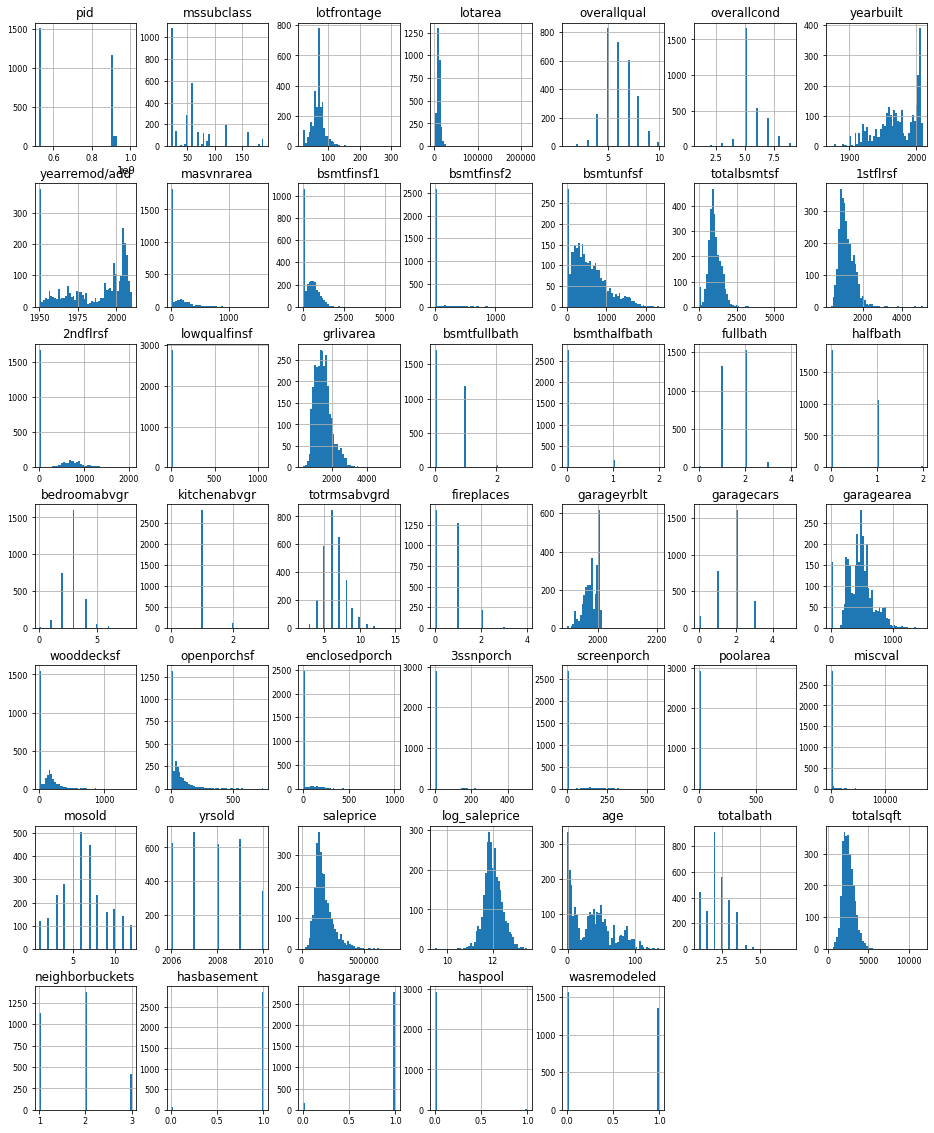

In [42]:
ames[numericfeatures].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [43]:
for col in list(categoricalfeatures) :
    print(ames[col].value_counts())
    print('#'*50)

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: mszoning, dtype: int64
##################################################
Reg    1859
IR1     979
IR2      76
IR3      16
Name: lotshape, dtype: int64
##################################################
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: landcontour, dtype: int64
##################################################
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: lotconfig, dtype: int64
##################################################
Gtl    2789
Mod     125
Sev      16
Name: landslope, dtype: int64
##################################################
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
C

### Bivariate

In [44]:
ames_corr = ames.corr()
ames_corr['saleprice'].sort_values(ascending=False)
#ames['log_saleprice'] = np.log(ames['saleprice'])

saleprice          1.000000
log_saleprice      0.946303
overallqual        0.799262
totalsqft          0.793071
grlivarea          0.706780
garagecars         0.647812
garagearea         0.640381
totalbath          0.636175
totalbsmtsf        0.632164
1stflrsf           0.621676
neighborbuckets    0.590116
yearbuilt          0.558426
fullbath           0.545604
yearremod/add      0.532974
garageyrblt        0.508882
masvnrarea         0.502196
totrmsabvgrd       0.495474
fireplaces         0.474558
bsmtfinsf1         0.432862
lotfrontage        0.340256
wooddecksf         0.327143
openporchsf        0.312951
halfbath           0.285056
bsmtfullbath       0.275823
2ndflrsf           0.269373
lotarea            0.266549
hasgarage          0.225950
bsmtunfsf          0.182895
hasbasement        0.152630
bedroomabvgr       0.143913
screenporch        0.112151
haspool            0.087960
poolarea           0.068403
mosold             0.035259
3ssnporch          0.032225
bsmtfinsf2         0

In [45]:
subsetd = ames[['saleprice','log_saleprice','grlivarea','totalsqft','totalbath','hasbasement',
                    'overallqual', 'hasgarage','neighborbuckets','age']]
#pd.plotting.scatter_matrix(subsetd, alpha=0.9, marker="o", figsize=(15,15),diagonal = 'kde', grid=True)

<AxesSubplot:>

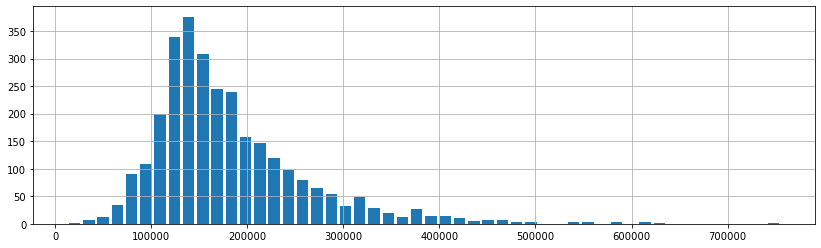

<AxesSubplot:>

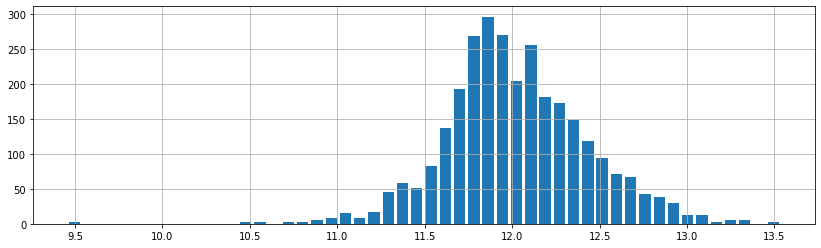

In [46]:
subsetd['saleprice'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()

subsetd['log_saleprice'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()

In [47]:
subsetd = ames[['log_saleprice','grlivarea','totalsqft','totalbath','hasbasement',
                    'overallqual', 'hasgarage','neighborbuckets','age']]
#pd.plotting.scatter_matrix(subsetd, alpha=0.9, marker="o", figsize=(15,15),diagonal = 'kde', grid=True)

There seems to be positive correlations with log_sale price.

## Is there any difference between the neighborhood buckets?

<AxesSubplot:title={'center':'saleprice'}, xlabel='[neighborbuckets]'>

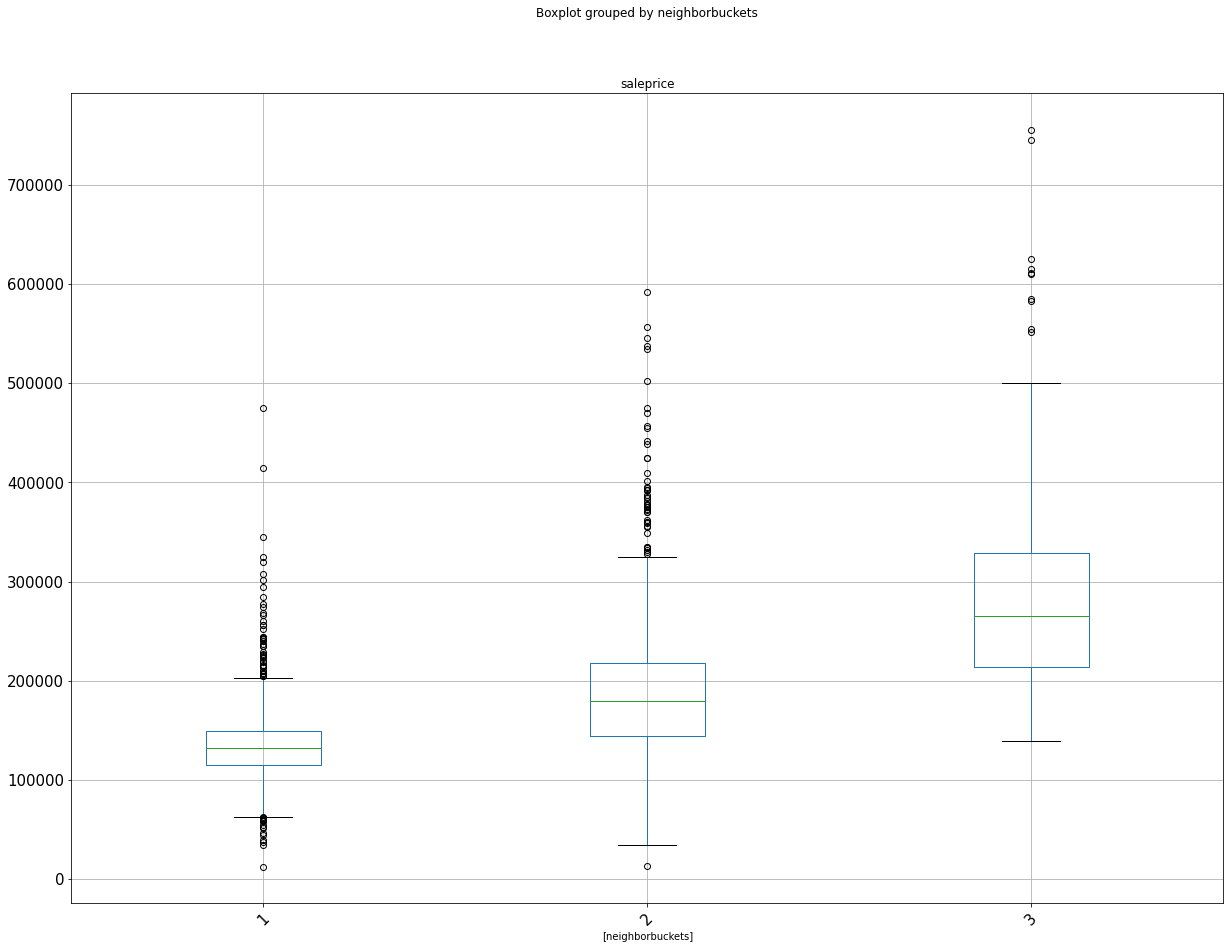

In [48]:
ames[['saleprice','neighborbuckets']].boxplot(column=['saleprice'], by=['neighborbuckets']
                                           ,rot=45, fontsize=15, figsize=(20,15))

In [49]:
from scipy.stats import f_oneway
n1 = ames[ames.neighborbuckets == 1]
n2 = ames[ames.neighborbuckets == 2]
n3 = ames[ames.neighborbuckets == 3]
stat, p = f_oneway(n1['saleprice'], n2['saleprice'], n3['saleprice'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Mean of all the categories are the same')
else:
    print('At least one mean is different')

stat=841.487, p=0.000
At least one mean is different


## Verify Sale price distribution

((array([-3.49555212, -3.25141499, -3.11638513, ...,  3.11638513,
          3.25141499,  3.49555212]),
  array([ 12789,  13100,  34900, ..., 625000, 745000, 755000], dtype=int64)),
 (74825.863175553, 180796.0600682594, 0.9358026011048884))

Text(0, 0.5, 'Sale Price')

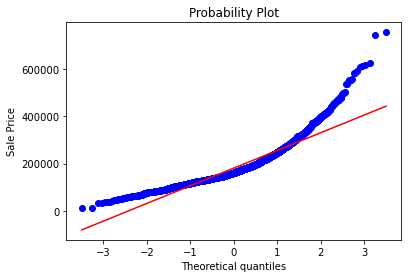

((array([-3.49555212, -3.25141499, -3.11638513, ...,  3.11638513,
          3.25141499,  3.49555212]),
  array([ 9.45634071,  9.48036751, 10.46024211, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.4049211767814775, 12.02096869011177, 0.9925610066837288))

Text(0, 0.5, 'Log Sale Price')

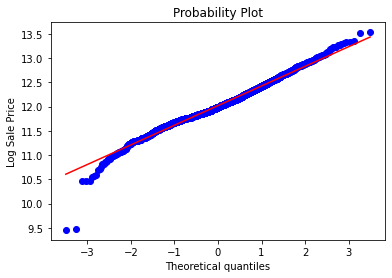

In [53]:
stats.probplot(ames['saleprice'], plot=plt)
plt.ylabel('Sale Price')
plt.show()
stats.probplot(np.log(ames['saleprice']), plot=plt)
plt.ylabel('Log Sale Price')
plt.show()

Eyeballing the normal probability plot for Sale price seems like it has fatter tails as compared to the normal distribution. Taking log transformation of the sale price seems to pass a fat pencil test.
Ho: Sale Price is normal (or Guassian) distributed
H1: Sale price is not normal distributed

## Hypothesis Testing

In [59]:
subsetd = ames[['log_saleprice','log_grlivarea','totalsqft','totalbath','hasbasement',
                    'overallqual', 'hasgarage','neighborbuckets','age']]


In [55]:
from scipy.stats import shapiro
series_2test = ames[['saleprice']]
stat, p = shapiro(series_2test)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.876, p=0.000
Probably not Gaussian


In [58]:
ames['log_grlivarea'] = np.log(ames['grlivarea'])

<AxesSubplot:>

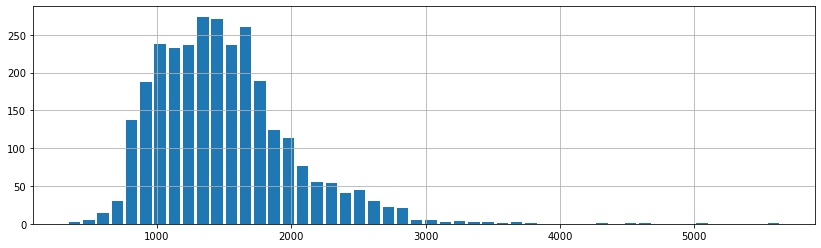

((array([-3.49555212, -3.25141499, -3.11638513, ...,  3.11638513,
          3.25141499,  3.49555212]),
  array([ 334,  407,  438, ..., 4676, 5095, 5642], dtype=int64)),
 (488.68230931450984, 1499.6904436860068, 0.9658390813078269))

Text(0, 0.5, 'grlivarea')

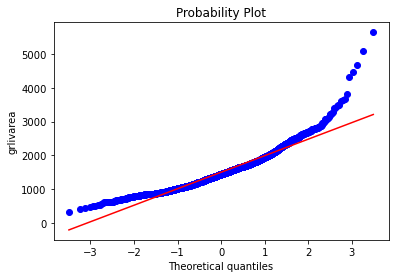

((array([-3.49555212, -3.25141499, -3.11638513, ...,  3.11638513,
          3.25141499,  3.49555212]),
  array([5.81114099, 6.00881319, 6.08221891, ..., 8.45019832, 8.53601495,
         8.63799389])),
 (0.3244437275224337, 7.260127644825557, 0.9983452245775338))

Text(0, 0.5, 'log Gr Liv Area')

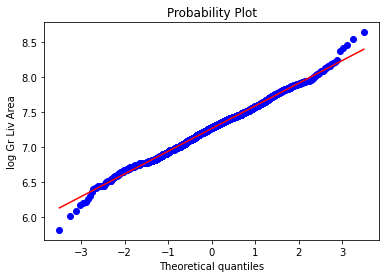

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: grlivarea, dtype: float64

In [65]:
ames['grlivarea'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()

stats.probplot(ames['grlivarea'], plot=plt)
plt.ylabel('grlivarea')
plt.show()
stats.probplot(np.log(ames['grlivarea']), plot=plt)
plt.ylabel('log Gr Liv Area')
plt.show()
ames['grlivarea'].describe()

## Predictive Modeling

In [ ]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

target= subsetd['log_saleprice']
df_train = subsetd.drop(['log_saleprice'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.33,random_state=0)
# Split data into train and test
ames_train = pd.concat([x_train, y_train], axis=1)
#ames_train.head()
ames_test = pd.concat([x_test, y_test], axis=1)

In [ ]:
ames_train.shape
ames_test.shape

In [ ]:
formula = 'log_saleprice ~ totalsqft + totalbath + overallqual \
            + C(neighborbuckets) + age'
ames_model = ols(formula, data=ames_train).fit()
print(ames_model.summary())

In [ ]:
print('Parameters: ', ames_model.params)
print('R2: ', ames_model.rsquared)

print('Standard errors: ', ames_model.bse)
print('Predicted values: ', ames_model.predict())

## Ref:https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)
print(lin_reg.fit)
print(lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, x_train.columns, columns=['Coefficient'])
coeff_df

In [ ]:
# Check for multicollinearity

In [ ]:
subsetd.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

### Time Series 

In [ ]:
ames_ts = pd.DataFrame(ames.groupby(['yrmosold']).pid.count())
ames_ts.info()
ames_ts.head()
ames_ts.tail()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ames_ts.pid.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

## Decomposition of Time series into seasonal and trend 

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(pd.Series(ames_ts.pid),period =12)
res = stl.fit()
fig = res.plot()

### Extra

### Plotting ACF and PACF

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ames_ts.pid.squeeze(), lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ames_ts, lags=24, ax=ax2)

## Figuring whether Multiplicative model or aditive model is more useful

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(ames_ts, model='multiplicative', period=12)

# Additive Decomposition
result_add = seasonal_decompose(ames_ts, model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## Fitting Models

In [ ]:
arma_mod = ARIMA(ames_ts, order=(1, 2, 0)).fit()
#print(arma_mod.summary())

In [ ]:
arma_mod2 = ARIMA(ames_ts, order=(1, 0, 0)).fit()
#print(arma_mod2.params)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod.resid.plot(ax=ax);
ax = fig.add_subplot(111)
ax = arma_mod2.resid.plot(ax=ax);